In [1]:
%reload_ext autoreload
%autoreload 2
import tensorflow as tf
from model.input import get_train_data
from model.encoder import convolutional_features

In [2]:
X, y = get_train_data(batch_size=2)
f = convolutional_features(tf.expand_dims(X['image'], -1))

In [8]:
init_op = tf.initialize_all_variables()
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    sess.run(init_op)
    X_val, encoded = sess.run([X['image'], f])
    coord.request_stop()
    coord.join(threads)

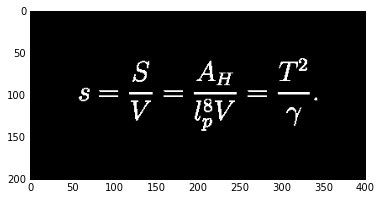

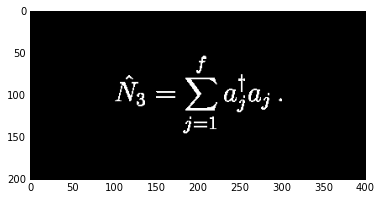

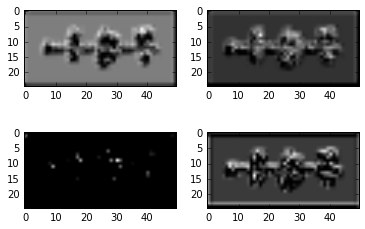

Summary Statistics:
  Max  = 1.94477
  Min  = 0.0
  Mean = 0.558819


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X_val[0] + 0.5, cmap='gray')
plt.show()
plt.imshow(X_val[1] + 0.5, cmap='gray')
plt.show()

plt.figure()
for x in range(1, 5):
    plt.subplot(2,2,x)
    plt.imshow(encoded[0,:,:,x], cmap='gray')
plt.show()

def summary_stats(image):
    print "Summary Statistics:"
    print "  Max  =", np.max(image)
    print "  Min  =", np.min(image)
    print "  Mean =", np.mean(image)
    
summary_stats(encoded[0,:,:,0])